In [55]:
import numpy as np
import pandas as pd

In [56]:
dataset = pd.read_csv("weather_forecast_dataset.csv")

In [57]:
dataset

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       14 non-null     int64 
 1   Outlook   14 non-null     object
 2   Temp      14 non-null     object
 3   Humidity  14 non-null     object
 4   Wind      14 non-null     object
 5   Decision  14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [59]:
dataset.describe()

,Day
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [60]:
dataset.isnull().sum()

Day         0
Outlook     0
Temp        0
Humidity    0
Wind        0
Decision    0
dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
df=pd.DataFrame(dataset)

In [63]:
label_encoders = {}
for column in ['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [72]:
# Split the dataset into training and testing sets
X = df.drop('Decision', axis=1)
y = df['Decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [74]:
y_pred = mnb.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [85]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8
Precision: 1.0
Recall: 0.8
F1 Score: 0.888888888888889


In [78]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [1, 4]], dtype=int64)

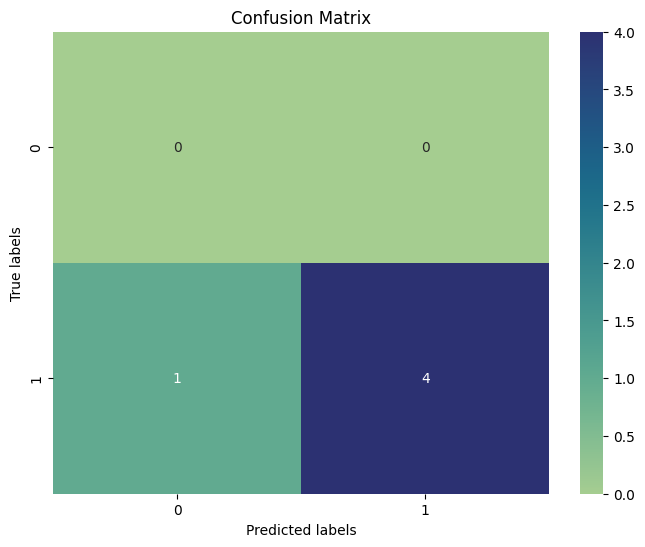

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()